# Combined Dataset Analysis
### By Rithvik Doshi

## Part 1: Import data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import os

curdir = "/content/drive/My Drive/Junior/CS506/Project/fall22-team-5/deliverables/deliverable3/"

os.chdir(curdir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Capital Budget

import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np

df = pd.read_csv("data/capital_budget/df.csv")
df2 = pd.read_csv("data/capital_budget/df2.csv")
df_budget_per_department_per_neighborhood = pd.read_csv("data/capital_budget/df_budget_per_department_per_neighborhood.csv")
df_budget_per_neighborhood = pd.read_csv("data/capital_budget/df_budget_per_neighborhood.csv")
df_operating_budget = pd.read_csv("data/capital_budget/df_operating_budget.csv")
df_operating_budget_total = pd.read_csv("data/capital_budget/df_operating_budget_total.csv")
df_revenue_budget = pd.read_csv("data/capital_budget/df_revenue_budget.csv")
df_revenue_budget_total = pd.read_csv("data/capital_budget/df_revenue_budget_total.csv")

In [3]:
# Rental Relief Fund

rrf1 = pd.read_csv("data/RRF/RRF10-20_03-21.csv")
rrf2 = pd.read_csv("data/RRF/RRF04-21_09-21.csv")

In [4]:
# Business Licenses

df_cannabis = pd.read_csv("data/business_licenses/df_cannabis.csv")
df_cannabis.index.title = "Cannabis Licenses"
df_food = pd.read_csv("data/business_licenses/df_food.csv")
df_food.index.title = "Food Licenses"
df_licensing = pd.read_csv("data/business_licenses/df_licensing.csv")
df_licensing.index.title = "General Licenses"
df_liquor = pd.read_csv("data/business_licenses/df_liquor.csv")
df_liquor.index.title = "Liquor Licenses"

In [5]:
# Demographics

demographics = pd.read_csv("data/demographics/df_neighborhoods.csv")

## Part 2: Normalize Data by Population for Business Licenses

In [6]:
# A key issue here is that there are some businesses that are classified as being in 'boston', which is not specific and not present in the demographic data. Therefore, we have to remove 'boston' and replace it with
# the more accurate labels. This is a map for the food businesses that are labeled boston, color coded to show difference by zip-codes

import matplotlib

licenseMap = folium.Map(location = [42.361145, -71.057083], zoom_start=11)
zips = {}
colors = matplotlib.colors.cnames.items()
colorlist = [i[0] for i in colors]
count = 0
for i in list(zip(df_food[df_food["CITY"] == 'boston']['Latitude'], df_food[df_food["CITY"] == 'boston']['Longitude'], df_food[df_food["CITY"] == 'boston']['ZIP'])):
    bruh = i[2]
    if bruh not in zips.keys():
      zips[bruh] = colorlist[count]
      count+=1
    if not (np.isnan(i[0]) or np.isnan(i[1])):
        folium.CircleMarker(location = [i[0], i[1]], radius=5, color=zips[bruh]).add_to(licenseMap)
licenseMap

In [7]:
# Using https://www.unitedstateszipcodes.org/ and estimating to nearest neighborhood present in PPC

bostonmiscdict = {'02110': 'downtown', '02116': 'backbay', '02111': 'chinatown', '02108': 'beaconhill', '02109': 'northend', '02114' : 'downtown', '02115': 'fenway', '02210':'southbostonwaterfront', '02122':'dorchester', '02215':'fenway', '02113':'northend', '02199':'backbay', '02134':'allston', '02135':'brighton', '02136':'hydepark', '02132':'westroxbury', '02127':'southboston', '02130':'jamaicaplain', '02131':'roslindale', '02118':'southend', '02117':'downtown', '02128':'eastboston', '02121':'roxbury', '02125':'dorchester', '02126':'mattapan', '02120':'jamaicaplain', '02124':'dorchester', '02163':'Allston', '02119':'Roxbury', '02201':'downtown', '02129':'charlestown', '02203':'downtown'}

In [8]:
demographics = demographics.drop("Unnamed: 0", axis = 1).reset_index(drop = True)

In [9]:
# Create and clean up demographic dictionary

ppc = demographics.iloc[:, :2]
ppc["field concept"] = ppc["field concept"].copy().apply(lambda x: str(x).lower().replace(" ", "").replace("/", ""))
ppc = ppc.set_index('field concept')
ppc = ppc.to_dict()
ppc = ppc['Total:']
ppc

{'allston': 28621,
 'backbay': 19588,
 'beaconhill': 9336,
 'brighton': 48330,
 'charlestown': 19120,
 'chinatown': 7143,
 'dorchester': 122191,
 'downtown': 13451,
 'eastboston': 43066,
 'fenway': 37733,
 'hydepark': 33009,
 'jamaicaplain': 41012,
 'longwood': 4096,
 'mattapan': 23834,
 'missionhill': 17886,
 'northend': 10805,
 'roslindale': 29386,
 'roxbury': 54905,
 'southboston': 37917,
 'southbostonwaterfront': 5579,
 'southend': 29373,
 'westend': 7705,
 'westroxbury': 31561}

In [10]:
# print(df_cannabis[df_cannabis['city'] == 'boston']['zip'])
df_cannabis = df_cannabis[~((df_cannabis['city'] == 'boston') & (df_cannabis['zip'].isna()))]
# print(df_cannabis[df_cannabis['city'] == 'boston']['zip'])
the_zips = '0' + df_cannabis[df_cannabis['city'] == 'boston']['zip'].astype(str)
the_zips = list(the_zips.values)
the_zips = list(map(lambda x: x[:-2], the_zips))
column = df_cannabis['city'].map(lambda x: x if x != 'boston' else bostonmiscdict[the_zips.pop(0)])
df_cannabis['city'] = column
df_cannabis = df_cannabis[df_cannabis['city'].isin(['nan', 'financialdistrict', 'downtownfinancialdistrict', 'chestnuthill']) == False]
df_cannabis['city'].value_counts()

<ipython-input-10-6801081a87b5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cannabis['city'] = column


dorchester      13
eastboston       5
roxbury          5
roslindale       5
allston          4
westroxbury      3
brighton         3
jamaicaplain     3
charlestown      3
northend         3
mattapan         2
hydepark         2
missionhill      1
downtown         1
southend         1
southboston      1
westend          1
backbay          1
Name: city, dtype: int64

In [11]:
df_liquor['city'] = df_liquor['city'].copy().apply(lambda x: str(x).lower().replace(" ", "").replace("/", ""))
df_liquor = df_liquor[~((df_liquor['city'] == 'boston') & (df_liquor['zip'].isna()))]
df_liquor = df_liquor[df_liquor['zip'].isin([' ', '02467']) == False]
the_zips = df_liquor[df_liquor['city'] == 'boston']['zip']
the_zips = list(the_zips.values)
column = df_liquor['city'].map(lambda x: x if x != 'boston' else bostonmiscdict[the_zips.pop(0)])
df_liquor['city'] = column
df_liquor = df_liquor[df_liquor['city'].isin(['nan', 'financialdistrict', 'downtownfinancialdistrict', 'chestnuthill']) == False]
df_liquor['city'].value_counts()

backbay                  159
northend                 143
eastboston               131
fenway                   130
downtown                 113
dorchester               104
roxbury                   99
southbostonwaterfront     87
southboston               81
chinatown                 74
brighton                  54
allston                   50
beaconhill                45
jamaicaplain              43
roslindale                33
westroxbury               27
charlestown               26
hydepark                  19
mattapan                  11
southend                   8
missionhill                3
Allston                    1
Name: city, dtype: int64

In [15]:
the_zips = df_food[df_food['CITY'] == 'boston']['ZIP']
the_zips = list(the_zips.values)
df_food = df_food[df_food['CITY'].isin(['nan', 'financialdistrict', 'downtownfinancialdistrict', 'chestnuthill']) == False]
df_food[df_food['CITY'] == 'boston']['CITY']
column = df_food['CITY'].map(lambda x: x if x != 'boston' else bostonmiscdict[the_zips.pop(0)])
df_food['CITY'] = column
df_food['CITY'].value_counts()

<ipython-input-15-3a7b8fabd2ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food['CITY'] = column


fenway                   384
downtown                 360
backbay                  261
dorchester               247
eastboston               217
northend                 197
brighton                 163
roxbury                  155
allston                  150
chinatown                141
southbostonwaterfront    140
jamaicaplain             104
southboston              104
beaconhill                99
roslindale                65
westroxbury               59
charlestown               41
hydepark                  39
mattapan                  37
missionhill               32
southend                  23
Name: CITY, dtype: int64

In [16]:
def plotvalcounts_normalized(df = df_food, label = "CITY"):
    df[label] = df[label].copy().apply(lambda x: str(x).lower().replace(" ", "").replace("/", ""))
    uniquevals = pd.DataFrame(df[label].value_counts())
    uniquevals["normed"] = list(map(lambda x: x[1] / ppc[x[0]], zip(list(uniquevals.index), uniquevals[label].values)))
    # print()
    # print(uniquevals['normed'])
    fig, ax = plt.subplots()
    ax.bar(uniquevals.index, uniquevals['normed'])
    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.title(f"{df.index.title} per {label}")
    plt.show()
    print(uniquevals)

<ipython-input-16-13cde7e1c784>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = df[label].copy().apply(lambda x: str(x).lower().replace(" ", "").replace("/", ""))


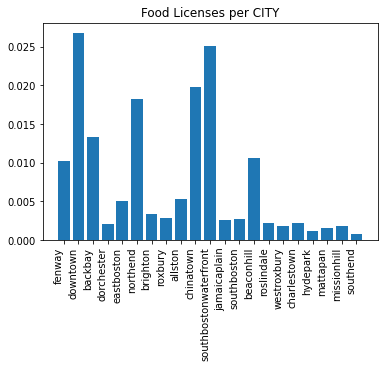

                       CITY    normed
fenway                  384  0.010177
downtown                360  0.026764
backbay                 261  0.013324
dorchester              247  0.002021
eastboston              217  0.005039
northend                197  0.018232
brighton                163  0.003373
roxbury                 155  0.002823
allston                 150  0.005241
chinatown               141  0.019740
southbostonwaterfront   140  0.025094
jamaicaplain            104  0.002536
southboston             104  0.002743
beaconhill               99  0.010604
roslindale               65  0.002212
westroxbury              59  0.001869
charlestown              41  0.002144
hydepark                 39  0.001181
mattapan                 37  0.001552
missionhill              32  0.001789
southend                 23  0.000783


In [17]:
df_food.index.title = "Food Licenses"
plotvalcounts_normalized(df_food, 'CITY')

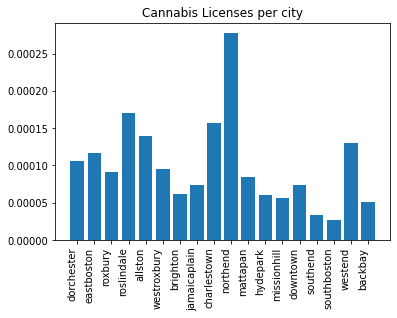

              city    normed
dorchester      13  0.000106
eastboston       5  0.000116
roxbury          5  0.000091
roslindale       5  0.000170
allston          4  0.000140
westroxbury      3  0.000095
brighton         3  0.000062
jamaicaplain     3  0.000073
charlestown      3  0.000157
northend         3  0.000278
mattapan         2  0.000084
hydepark         2  0.000061
missionhill      1  0.000056
downtown         1  0.000074
southend         1  0.000034
southboston      1  0.000026
westend          1  0.000130
backbay          1  0.000051


In [18]:
df_cannabis.index.title = "Cannabis Licenses"
plotvalcounts_normalized(df_cannabis, 'city')

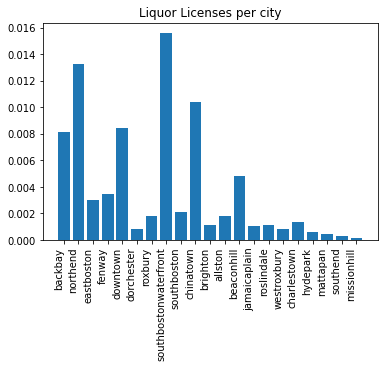

                       city    normed
backbay                 159  0.008117
northend                143  0.013235
eastboston              131  0.003042
fenway                  130  0.003445
downtown                113  0.008401
dorchester              104  0.000851
roxbury                  99  0.001803
southbostonwaterfront    87  0.015594
southboston              81  0.002136
chinatown                74  0.010360
brighton                 54  0.001117
allston                  51  0.001782
beaconhill               45  0.004820
jamaicaplain             43  0.001048
roslindale               33  0.001123
westroxbury              27  0.000855
charlestown              26  0.001360
hydepark                 19  0.000576
mattapan                 11  0.000462
southend                  8  0.000272
missionhill               3  0.000168


In [19]:
df_liquor.index.title = "Liquor Licenses"
plotvalcounts_normalized(df_liquor, 'city')

## Part 3: Organize Rent Relief by City

In [20]:
rrf1 = rrf1.drop("Unnamed: 0", axis = 1).reset_index(drop = True)

In [21]:
rrf1['original_zip'] = rrf1['original_zip'].map(lambda x: "0" + str(x))

In [22]:
rrf1['original_zip'].value_counts()

02128    181
02124     82
02125     52
02119     49
02122     46
02121     43
02136     37
02126     36
02135     31
02131     23
02111     22
02130     22
02134     21
02118     15
02132     15
02127     14
02129     13
02115      9
02215      9
02114      8
02113      6
02116      5
02109      5
02108      3
02120      3
02210      1
02199      1
02467      1
Name: original_zip, dtype: int64

In [23]:
cities_zips = list(zip(df_food['CITY'], df_food['ZIP']))
# cities_zips
zipdict = {}
for a, b in cities_zips:
    zipdict.setdefault(b, []).append(a)
for i in zipdict:
    zipdict[i] = max(set(zipdict[i]))

In [24]:
# zipdict.pop(" ")
zipdict

{'02132': 'westroxbury',
 '02110': 'downtown',
 '02130': 'roslindale',
 '02116': 'roxbury',
 '02125': 'dorchester',
 '02135': 'brighton',
 '02129': 'charlestown',
 '02111': 'chinatown',
 '02108': 'beaconhill',
 '02136': 'hydepark',
 '02109': 'northend',
 '02114': 'roxbury',
 '02115': 'roxbury',
 '02210': 'southbostonwaterfront',
 '02131': 'roslindale',
 '02134': 'brighton',
 '02120': 'roxbury',
 '02118': 'southend',
 '02467': 'westroxbury',
 '02122': 'dorchester',
 '02128': 'eastboston',
 '02215': 'fenway',
 '02113': 'northend',
 '02127': 'southboston',
 '02126': 'mattapan',
 '02199': 'backbay',
 '02119': 'roxbury',
 '02124': 'dorchester',
 '02163': 'allston',
 '02121': 'roxbury',
 '02117': 'downtown',
 '02140': 'jamaicaplain',
 '02148': 'eastboston',
 '02201': 'downtown',
 '02203': 'downtown'}

In [25]:
rrf1['city'] = rrf1['original_zip'].map(lambda x: zipdict[x])
rrf1['city'].value_counts()

eastboston               181
dorchester               180
roxbury                  117
brighton                  52
roslindale                45
hydepark                  37
mattapan                  36
chinatown                 22
westroxbury               16
southend                  15
southboston               14
charlestown               13
northend                  11
fenway                     9
beaconhill                 3
southbostonwaterfront      1
backbay                    1
Name: city, dtype: int64

In [26]:
rrf2 = rrf2.drop("Unnamed: 0", axis = 1).reset_index(drop = True)

In [27]:
rrf2['original_zip'] = rrf2['original_zip'].map(lambda x: "0" + str(x))

In [28]:
rrf2['city'] = rrf2['original_zip'].map(lambda x: zipdict[x] if x in zipdict.keys() else "Not Found")
rrf2['city'].value_counts()

dorchester               380
roxbury                  327
eastboston               171
roslindale               104
hydepark                  95
brighton                  75
mattapan                  74
southend                  36
westroxbury               35
chinatown                 31
southbostonwaterfront     21
fenway                    13
charlestown               12
southboston               12
northend                  12
beaconhill                 8
Not Found                  1
downtown                   1
Name: city, dtype: int64

In [29]:
rrf1.groupby(by = 'city').sum()

,id,state_code,county_code,tract_code,block_code,RRF Award Amount,No of months of assistance,Rent owing,Mthly Self Employment,Mthly Unemployment,Mthly Interest or Dividend,Mthly Pension or Retirement,Mthly TANF/Public Assistance,Mthly Alimony income,Mthly Armed Forces income,Mthly Other income
city,,,,,,,,,,,,,,,,
backbay,9415,25,25,10600,2001,6000.00,4.0,5684.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
beaconhill,26046,75,75,80705,3097,12000.00,7.0,42005.00,4480.0,3804.0,0.0,1237.00,0.0,0.0,0.0,0.0
brighton,433566,1300,1300,27563,95260,207049.00,110.0,147194.54,2500.0,22738.0,0.0,1661.00,0.0,0.0,0.0,1960.0
charlestown,105812,325,325,527303,18244,49715.00,24.0,39211.79,0.0,8302.0,0.0,0.00,0.0,0.0,0.0,800.0
chinatown,164317,550,550,1543453,25090,79732.00,43.0,59279.69,500.0,20174.0,0.0,1931.00,0.0,410.0,0.0,501.0
dorchester,1452005,4500,4500,17075149,470776,812080.00,329.0,717382.25,10715.0,115223.0,200.0,2288.58,4128.0,4446.0,0.0,11146.0
eastboston,1291490,4525,4525,9164550,367725,814266.00,406.0,757338.55,20342.0,60301.0,0.0,0.00,1497.0,4174.0,250.0,6913.0
fenway,70091,225,225,91644,23026,32185.00,16.0,12216.62,0.0,5760.0,0.0,1200.00,0.0,0.0,0.0,800.0
hydepark,282104,925,925,5189647,96240,140253.00,67.0,128452.00,760.0,14646.0,0.0,0.00,400.0,0.0,0.0,2141.0


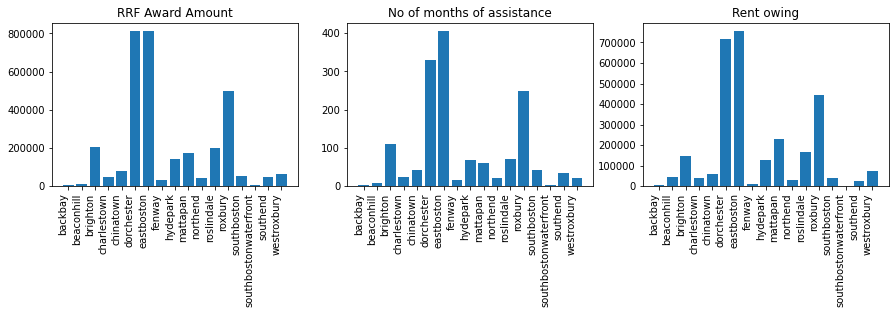

In [30]:
fig, ax = plt.subplots(1, 3)
ax[0].bar(rrf1.groupby(by = 'city').sum().index, rrf1.groupby(by = 'city').sum().iloc[:, 5])
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[0].set_title('RRF Award Amount')

ax[1].bar(rrf1.groupby(by = 'city').sum().index, rrf1.groupby(by = 'city').sum().iloc[:, 6])
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[1].set_title('No of months of assistance')

ax[2].bar(rrf1.groupby(by = 'city').sum().index, rrf1.groupby(by = 'city').sum().iloc[:, 7])
plt.setp(ax[2].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[2].set_title('Rent owing')

fig.set_figheight(3)
fig.set_figwidth(15)
plt.show()

In [31]:
rrf2.groupby(by = 'city').sum()

,id,state_code,county_code,tract_code,block_code,Rental Relief Fund: How much rent do you owe due to COVID-19,Rental Relief Fund: How much do you owe on utilities listed?,Utility Payments - Amount obtained (),Future Stipend - Amount obtained (),Rental Arrears - Amount obtained (),Moving Costs - Amount obtained (),Total RRF Award
city,,,,,,,,,,,,
Not Found,162755,25.0,25.0,100400.0,4000.0,0.00,0.00,0.00,1998.00,7000.00,0.00,8998.00
beaconhill,1314841,50.0,50.0,353812.0,11234.0,78920.00,4829.14,1989.75,56450.00,34000.00,0.00,92439.75
brighton,12301427,1825.0,1825.0,5145068.0,158437.0,386958.23,34669.34,13996.88,297416.98,262471.16,14400.00,636490.02
charlestown,1970228,250.0,250.0,929503.0,20071.0,34830.74,7022.73,5205.04,26448.74,38356.00,3000.00,76909.78
chinatown,5095962,650.0,650.0,3152049.0,59158.0,144242.12,277513.77,2047.26,124977.76,83722.73,0.00,223545.60
dorchester,62336053,8375.0,8375.0,30079083.0,838701.0,1770190.47,275158.84,91066.99,1378301.46,1366143.98,61877.74,3042778.98
downtown,164238,25.0,25.0,80801.0,2011.0,1168.00,0.00,0.00,3504.00,2336.00,0.00,5840.00
eastboston,28046220,3900.0,3900.0,12393139.0,354691.0,738445.15,185516.10,35586.16,639417.69,698633.22,5856.00,1474352.85
fenway,2128395,250.0,250.0,617621.0,22115.0,36073.00,4873.61,2955.86,32118.51,42723.34,3500.00,86492.20


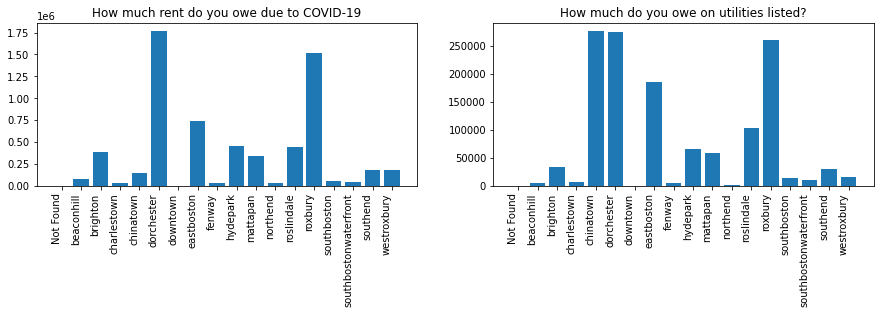

In [32]:
fig, ax = plt.subplots(1, 2)
ax[0].bar(rrf2.groupby(by = 'city').sum().index, rrf2.groupby(by = 'city').sum()['Rental Relief Fund: How much rent do you owe due to COVID-19'])
plt.setp(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[0].set_title('How much rent do you owe due to COVID-19')

ax[1].bar(rrf2.groupby(by = 'city').sum().index, rrf2.groupby(by = 'city').sum()['Rental Relief Fund: How much do you owe on utilities listed?'])
plt.setp(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[1].set_title('How much do you owe on utilities listed?')

fig.set_figheight(3)
fig.set_figwidth(15)
plt.show()